# はじめに
大学生の頃はフーリエ変換とかFFTとか、あまり理解しないまま使っていた。社会人になって使う機会があるので、勉強＆メモついでに学習した内容まとめる。
ドキュメントやサンプルコードは勉強するごとにアップデートさせる。

## フーリエ変換
フーリエ変換は、信号を時間領域から周波数領域へ変換する方法。<br>
デジタルな世界では信号は離散時間で表現されるが、離散時間信号を連続時間信号としてフーリエ変換した場合、スペクトラム成分は必ず0になってしまう。<br>
そのため、離散時間信号(Discrete Fourier Transform: DFT)は離散フーリエ変換させることで、周波数領域への変換が可能となる。<br>
離散フーリエ変換の計算速度を速くしたのが、高速フーリエ変換 (Fast Fourier Transform)である。<br>

## FFTの注意点
- **対象信号の周波数がサンプリング周波数の 1/2 以上でなければ、正しくデータをサンプリングできない**<br>
　※サイン信号を最低2点取れば、プラス側のデータとマイナス側のデータが取得でき波形として再現できる。
- **離散フーリエ変換の対称性より、スペクトル波形はナイキスト周波数を中心に左右対称となる**

## 参考サイト
http://www.ic.is.tohoku.ac.jp/~swk/lecture/yaruodsp/dtft.html
https://note.com/minmin_py/n/ne759a646765c

## サンプルコード

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ------------------------
# 設定値
# ------------------------

# 分解能
reso = 16
# データサイズ
data_size = 2 ** reso
# サンプリング周波数
fs = 1 * 10**6
# ナイキスト周波数
fn = 1 / ( 2 * fs )
# FFTテスト用正弦波の周波数
f_sample= 1000
# データサイズ
data_size = 2 ** reso
# 時間
t = np.arange( 0, data_size / fs, 1 / fs )



In [3]:
# ------------------------
# FFTテスト用正弦波の生成
# ------------------------

# FFTテスト用正弦波の周波数
f_sample= 1000
# FFTテスト用正弦波
sample_signal = np.sin( 2.0 * np.pi * f_sample * t )

In [4]:
# ------------------------
# FFT
# ------------------------

# FFT
fft_data = np.fft.fft(sample_signal)

# 周波数軸の作成
fft_freq = np.fft.fftfreq( data_size, d = 1/fs )

# 周波数スペクトルを計算
fft_spectrum = np.abs( fft_data )

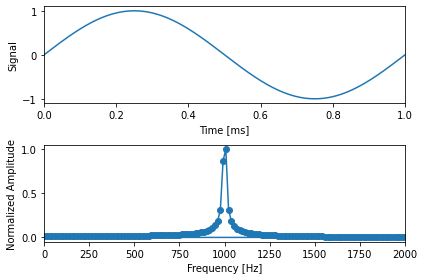

In [6]:
# ------------------------
# グラフの表示
# ------------------------

# グラフ枠の作成
fig = plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

# ---- 時間信号のデータ表示 ---- #

# 単位をmsとするために10^3をかける
ax1.plot( t * 10**3, sample_signal )
# 表示範囲：1周期
ax1.set_xlim(0, 1/ f_sample* 10**3)
# ラベル
ax1.set_xlabel("Time [ms]")
ax1.set_ylabel("Signal")


# ---- 周波数スペクトルのデータ表示 ---- # 

# 周波数スペクトルの振幅はデータとして意味をなさないため正規化
ax2.plot( fft_freq, fft_spectrum / max(fft_spectrum) , marker= 'o', linestyle='-')
# 表示範囲：信号の周波数付近
ax2.set_xlim(0,f_sample + f_sample * 1.0 )
# ラベル
ax2.set_xlabel("Frequency [Hz]")
ax2.set_ylabel("Normalized Amplitude")

# グラフのラベルを重ならないようにする
plt.tight_layout()